### Create simple graph (n>10)

Enter vertices:  11


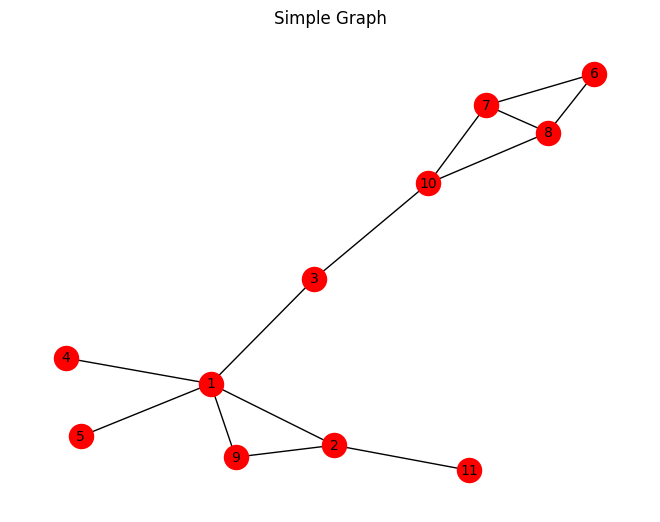

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

def get_valid_input():
    while True:
        n = int(input("Enter vertices: "))
        if n <= 10:
            print("Enter value greater than 10.")
        else:
            return n

def main():
    num_vertices = get_valid_input()

    nodes = list(range(1, num_vertices + 1))
    g = nx.Graph()
    g.add_edges_from([(1, 4), (1, 9), (1, 3), (1, 2), (1, 5), (6, 8), (7, 10), (6, 7), (9, 2), (2, 11), (3, 10), (10, 8), (7, 8)])
    nx.draw(g, with_labels=True, node_color='red', node_size=300, font_size=10)
    plt.title('Simple Graph')
    plt.show()

if __name__ == "__main__":
    main()


### Create Complete Graph (Ensure n > 10)

Enter vertices (>10):  11


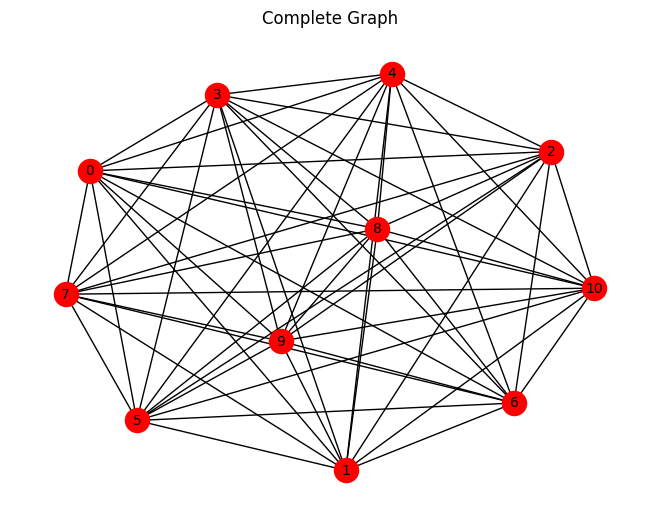

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def get_valid_input():
    while True:
        n = int(input("Enter vertices (>10): "))
        if n <= 10:
            print("enter value greater than 10.")
        else:
            return n

def main():
    num_vertices = get_valid_input()
    complete_graph = nx.complete_graph(num_vertices)

    # Drawing the complete graph
    nx.draw(complete_graph, with_labels=True, node_color='red', node_size=300, font_size=10)
    plt.title('Complete Graph')
    plt.show()

if __name__ == "__main__":
    main()


### Create Bipartite (Ensure n > 10)

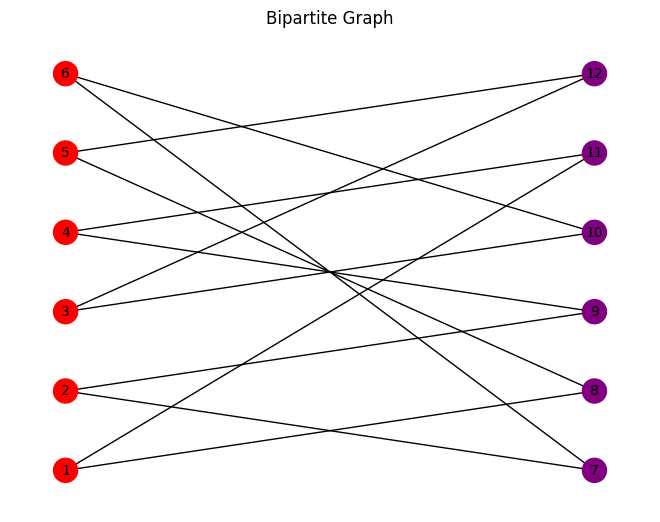

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def create_bipartite_graph(n):
    BG = nx.Graph()
    top_nodes = range(1, n // 2 + 1)
    bottom_nodes = range(n // 2 + 1, n + 1)
    BG.add_nodes_from(top_nodes, bipartite=0)
    BG.add_nodes_from(bottom_nodes, bipartite=1)

    edges = [(1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 7), (1, 11), (6, 10), (4, 9), (3, 12), (5, 8), (2, 7)]
    BG.add_edges_from(edges)

    return BG, top_nodes

def main():
    n = 12
    bipartite_graph, top_nodes = create_bipartite_graph(n)

    pos = nx.bipartite_layout(bipartite_graph, top_nodes)

    node_colors = {node: 'red' if bipartite_graph.nodes[node]['bipartite'] == 0 else 'purple' for node in bipartite_graph.nodes}

    nx.draw(bipartite_graph, pos, with_labels=True, node_color=[node_colors[node] for node in bipartite_graph.nodes], node_size=300, font_size=10)
    plt.title('Bipartite Graph')
    plt.show()

if __name__ == "__main__":
    main()


### Create Tripartite Graphs (Ensure n > 10)

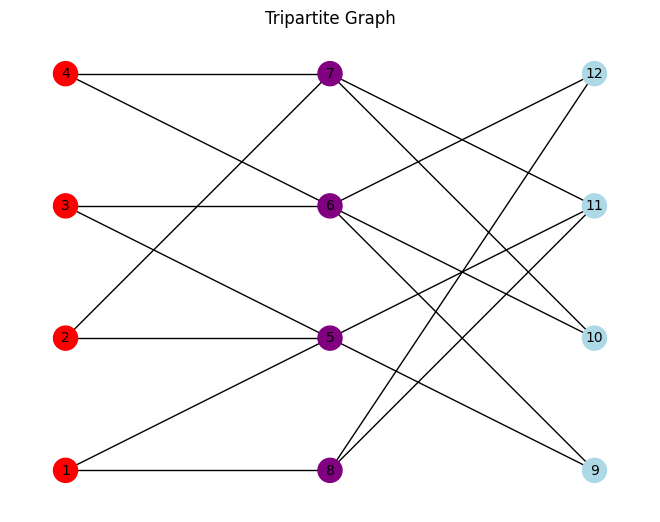

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

def create_tripartite_graph():
    G = nx.Graph() 

    set_A = {1, 2, 3, 4}
    set_B = {5, 6, 7, 8}
    set_C = {9, 10, 11, 12}

    G.add_nodes_from(set_A, tripartite=0)
    G.add_nodes_from(set_B, tripartite=1)
    G.add_nodes_from(set_C, tripartite=2)

    edges = [(1, 5), (4, 6), (3, 5), (2, 5), (2, 7), (6, 12), (3, 6), (4, 7), (1, 8), (6, 9), (8, 12), (5, 9), (8, 11), (6, 10), (5, 11), (7, 11), (7, 10)]
    G.add_edges_from(edges)

    return G, set_A, set_B, set_C

# Function to draw the tripartite graph
def draw_tripartite_graph():
    tripartite_graph, set_A, set_B, set_C = create_tripartite_graph()

    pos = {}
    pos.update((n, (1, i)) for i, n in enumerate(set_A))
    pos.update((n, (2, i)) for i, n in enumerate(set_B))
    pos.update((n, (3, i)) for i, n in enumerate(set_C))

    node_colors = {node: 'red' if tripartite_graph.nodes[node]['tripartite'] == 0 else 'purple' if tripartite_graph.nodes[node]['tripartite'] == 1 else 'lightblue' for node in tripartite_graph.nodes}
    nx.draw(tripartite_graph, pos, with_labels=True, node_color=[node_colors[node] for node in tripartite_graph.nodes], node_size=300, font_size=10, font_color='black')

    plt.title("Tripartite Graph")
    plt.show()


if __name__ == "__main__":
    draw_tripartite_graph()


### Apply Havel-Hakimi Theorem on a Simple Graph

In [16]:
import random

def generate_random_simple_graph(nodes):
    edges = []
    for i in range(nodes):
        for j in range(i+1, nodes):
            if random.choice([True, False]):
                edges.append((i, j))
    return edges

def is_graphical_degree_sequence(deg_seq):
    deg_seq.sort(reverse=True)

    while deg_seq[0] > 0:
        degree = deg_seq.pop(0)

        if len(deg_seq) < degree:
            return False

        for i in range(degree):
            deg_seq[i] -= 1

        deg_seq.sort(reverse=True)
        print(f"Updated Degree Sequence: {deg_seq}")

    return True

def main():
    num_nodes = random.randint(10, 15)
    edges = generate_random_simple_graph(num_nodes)
    
    degrees = [0] * num_nodes
    for edge in edges:
        degrees[edge[0]] += 1
        degrees[edge[1]] += 1

    print(f"Original Degree Sequence: {degrees}")
    
    # Apply the algorithm on the degree sequence
    result = is_graphical_degree_sequence(degrees)
    
    print("\ngraphical?", result)

if __name__ == "__main__":
    main()


Original Degree Sequence: [4, 3, 5, 4, 4, 4, 7, 4, 5, 4, 2]
Updated Degree Sequence: [4, 4, 4, 3, 3, 3, 3, 3, 3, 2]
Updated Degree Sequence: [3, 3, 3, 3, 3, 3, 2, 2, 2]
Updated Degree Sequence: [3, 3, 2, 2, 2, 2, 2, 2]
Updated Degree Sequence: [2, 2, 2, 2, 2, 1, 1]
Updated Degree Sequence: [2, 2, 1, 1, 1, 1]
Updated Degree Sequence: [1, 1, 1, 1, 0]
Updated Degree Sequence: [1, 1, 0, 0]
Updated Degree Sequence: [0, 0, 0]

graphical? True
